<a href="https://colab.research.google.com/github/AshishMoundekar/spam-detection/blob/master/Spam_classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages**

Let's mount our Google Drive for Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Phase 1:- Data Preparation**

---
1. Collection & Exploration
2. Cleaning
3. Text Perprocessing

**Step 1:- Data Collection, Exploration and Visualization**

---

In [ ]:
# Load and Inspect Data
import pandas as pd

spam_data = pd.read_csv('/content/drive/MyDrive/Datasets/spam_data.csv', encoding = 'latin-1', engine= 'python')
spam_data = spam_data.iloc[:, :2]
spam_data.columns = ['Label' ,'SMS']  # Rename columns for clarity
print(spam_data.head(5))

  Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
print(spam_data.isnull().sum())

Label    0
SMS      0
dtype: int64


In [ ]:
print(spam_data['Label'].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


**Step 2. Data Cleaning**

---

In [ ]:
# Text Cleaning
import re
from string import punctuation

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in punctuation]
    return ' '.join(text)

spam_data['SMS'] = spam_data['SMS'].apply(clean_text)

In [ ]:
# Text Preprocessing - Tokenization and Stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

ps = PorterStemmer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

spam_data['SMS'] = spam_data['SMS'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


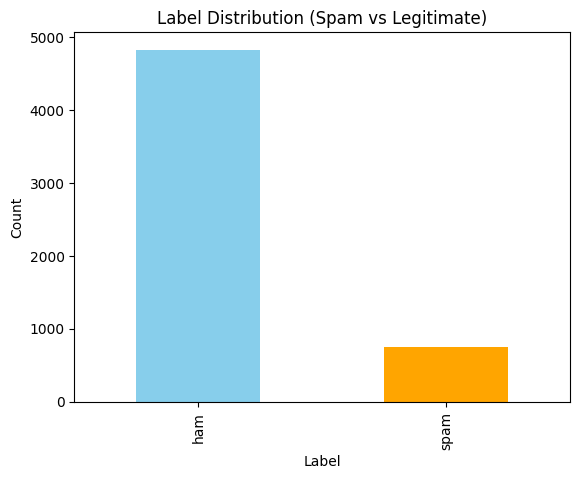

In [ ]:
import matplotlib.pyplot as plt

spam_data['Label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution (Spam vs Legitimate)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

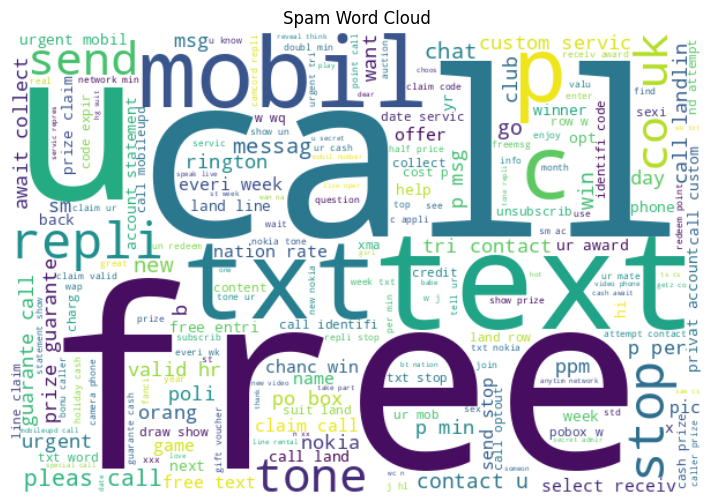

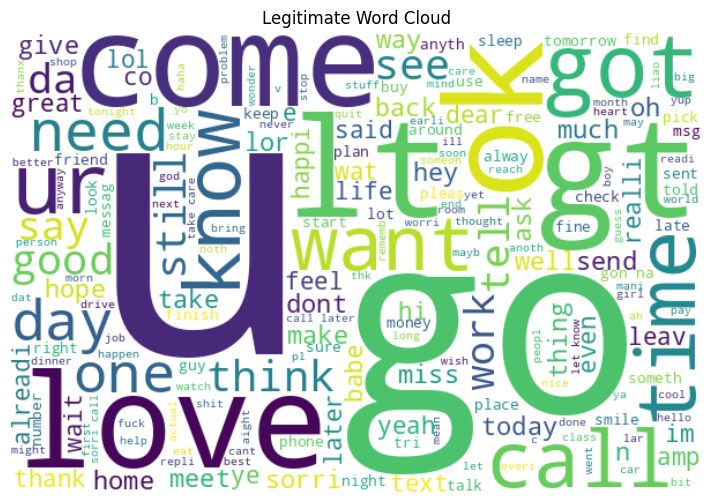

In [ ]:
# Word Cloud visualization
from wordcloud import WordCloud

spam_words = ' '.join(spam_data[spam_data['Label'] == 'spam']['SMS'])
ham_words = ' '.join(spam_data[spam_data['Label'] == 'ham']['SMS'])

spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Spam Word Cloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Legitimate Word Cloud")
plt.axis("off")
plt.show()


**Phase 2: Feature Engineering**

---
1. Vectorization to model buliding
* TF-IDF
* Bag of Words (BoW)
---
2. Feature Selection

In [ ]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X = spam_data['SMS']
Y = spam_data['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [ ]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [ ]:
# Model Training and Evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_pred))
print(classification_report(Y_test, nb_pred))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, Y_train)
lr_pred = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, lr_pred))
print(classification_report(Y_test, lr_pred))

# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, Y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print(classification_report(Y_test, svm_pred))

Naive Bayes Accuracy: 0.9659192825112107
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Accuracy: 0.957847533632287
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.96      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

SVM Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   mac

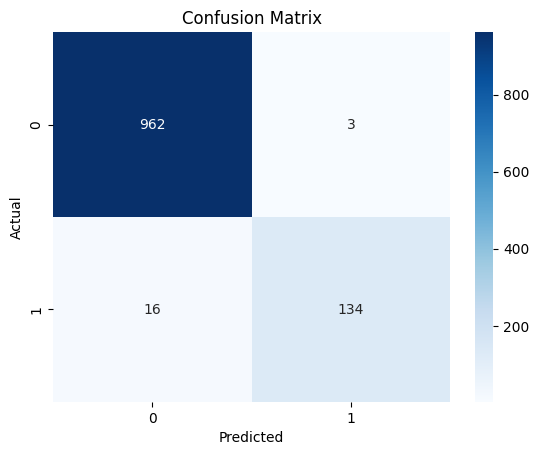

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix Visualization
cm = confusion_matrix(Y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

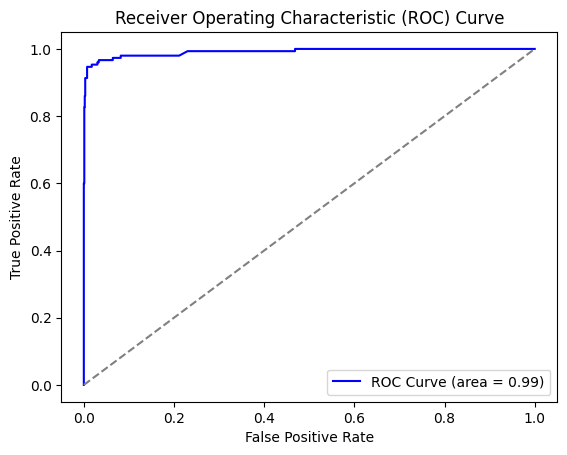

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve Visualization
svm_pred_prob = svm_model.predict_proba(X_test_tfidf)[:, 1]  # Example for Logistic Regression
fpr, tpr, thresholds = roc_curve(Y_test, svm_pred_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

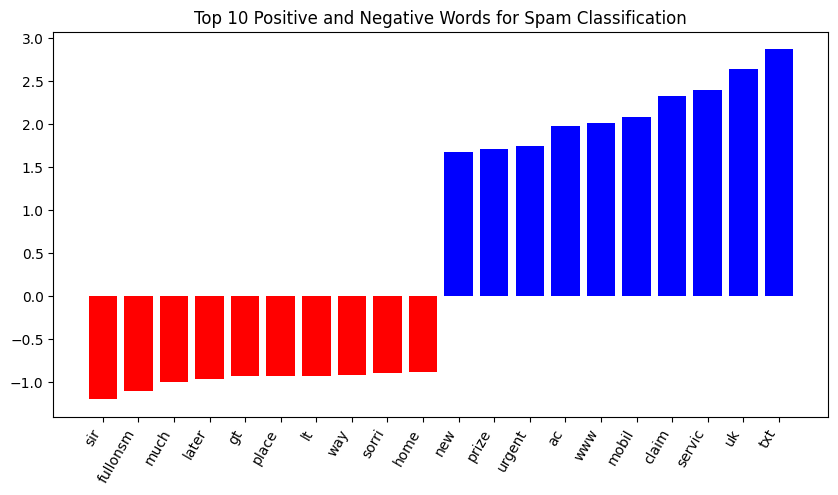

In [ ]:
import numpy as np

# Feature Importance Visualization for Logistic Regression
feature_names = np.array(tfidf.get_feature_names_out())
coef = svm_model.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-10:]
top_negative_coefficients = np.argsort(coef)[:10]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(10, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(20), coef[top_coefficients], color=colors)
plt.xticks(np.arange(20), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Top 10 Positive and Negative Words for Spam Classification')
plt.show()

In [ ]:
new_sms = ["Congratulations! You've won a free prize, claim now!"]
new_sms_tfidf = tfidf.transform(new_sms).toarray()
pred = svm_model.predict(new_sms_tfidf)
print("Prediction:", pred)

Prediction: ['spam']


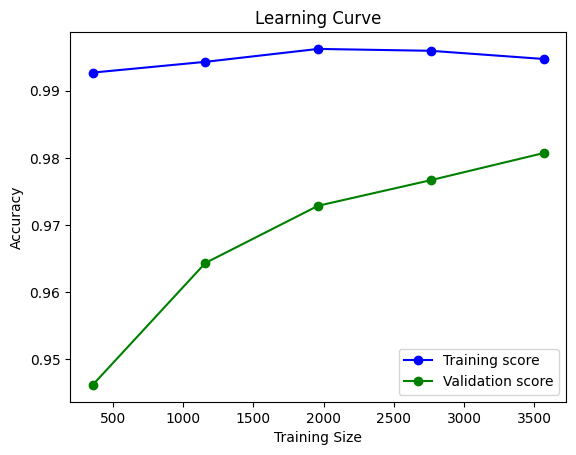

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(svm_model, X_train_tfidf, Y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
import joblib

# Save the SVM model and TF-IDF vectorizer
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
import matplotlib
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("nltk", nltk.__version__)
import sklearn
print("sklearn", sklearn.__version__)
import sklearn as scikit_learn
print("scikit-learn", scikit_learn.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.8.0
seaborn 0.13.2
nltk 3.9.1
sklearn 1.5.2
scikit-learn 1.5.2
